In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_theme(style="whitegrid")

# Parameter
algo = 'dots' # Can be 'dots', 'dp'

# Load Data for Points Plot (algo_points.csv)
points_file = f'{algo}_points.csv'
df_points = pd.read_csv(points_file)
# Normalize columns if needed (dots_points.csv seems to have standard names)
# Remove rows with any -1 values (failed runs)
df_points = df_points[~(df_points == -1).any(axis=1)]

# Load Data for Dist Plot (algo_frechet.csv)
frechet_file = f'{algo}_frechet.csv'
df_frechet = pd.read_csv(frechet_file)
# Rename columns for frechet file
df_frechet = df_frechet.rename(columns={'best_points': 'simp_points', 'best_simp_dist': 'simp_dist'})
# Remove rows with any -1 values (failed runs)
df_frechet = df_frechet[~(df_frechet == -1).any(axis=1)]

print(f"Loaded {points_file} and {frechet_file}")
display(df_points.head())
display(df_frechet.head())

# Basic Summary
print("Points Dataset Summary:")
display(df_points.describe())
print("Frechet Dataset Summary:")
display(df_frechet.describe())

Loaded dots_points.csv and dots_frechet.csv


,id,delta,epsilon,baseline_dist,simp_dist,baseline_points,simp_points
0,7,1.064143,0.5,1.596214,1.509882,385,326
1,4,11.860031,0.5,17.790047,16.777295,136,104
2,6,14.323947,0.5,21.485921,20.261949,405,244
3,3,14.194698,0.5,21.292048,20.079181,650,464
4,9,13.712736,0.5,20.569104,19.397716,557,444


,id,best_delta,epsilon,baseline_dist,simp_dist,baseline_points,simp_points
0,4,11.860031,0.5,17.790047,16.777295,136,104
1,6,11.459158,0.5,21.485921,16.280813,405,260
2,1,7.551141,0.5,17.697987,10.702742,206,188
3,13,6.727888,0.5,10.091831,9.519650,337,310
4,12,5.068545,0.5,14.849252,7.171575,174,174


Points Dataset Summary:


,id,delta,epsilon,baseline_dist,simp_dist,baseline_points,simp_points
count,47.000000,47.000000,47.0,47.000000,47.000000,47.000000,47.00000
mean,39.829787,11.538550,0.5,17.307825,16.340879,593.829787,414.00000
std,25.498780,3.234808,0.0,4.852212,4.584460,421.514831,284.44515
min,1.000000,0.000013,0.5,0.000020,0.000027,2.000000,2.00000
25%,18.500000,10.477173,0.5,15.715760,14.879590,219.000000,137.00000
50%,37.000000,12.527251,0.5,18.790877,17.720445,535.000000,402.00000
75%,57.500000,13.742388,0.5,20.613581,19.515782,790.000000,607.00000
max,92.000000,14.854887,0.5,22.282330,21.010000,1729.000000,1164.00000


Frechet Dataset Summary:


,id,best_delta,epsilon,baseline_dist,simp_dist,baseline_points,simp_points
count,47.000000,47.000000,47.0,47.000000,47.000000,47.000000,47.000000
mean,39.829787,7.934389,0.5,17.307825,11.252315,593.829787,470.468085
std,25.498780,4.347064,0.0,4.852212,6.171547,421.514831,319.668092
min,1.000000,0.000013,0.5,0.000020,0.000027,2.000000,2.000000
25%,18.500000,4.541732,0.5,15.715760,6.438832,219.000000,190.000000
50%,37.000000,6.957282,0.5,18.790877,9.842871,535.000000,434.000000
75%,57.500000,11.537919,0.5,20.613581,16.388676,790.000000,643.000000
max,92.000000,14.854887,0.5,22.282330,21.010000,1729.000000,1458.000000


/var/folders/f3/h4301l8d7hn_1612_5g5hpmw0000gn/T/ipykernel_90337/230416834.py:41: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_points, x='baseline_points', y='simp_points', palette='viridis', ax=axes[0, 0], s=100)
/var/folders/f3/h4301l8d7hn_1612_5g5hpmw0000gn/T/ipykernel_90337/230416834.py:50: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_frechet, x='baseline_dist', y='simp_dist', palette='viridis', ax=axes[0, 1], s=100)
/var/folders/f3/h4301l8d7hn_1612_5g5hpmw0000gn/T/ipykernel_90337/230416834.py:61: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_points, x='orig_points', y='points_ratio', palette='viridis', ax=axes[1, 0], s=100)
/var/folders/f3/h4301l8d7hn_1612_5g5hpmw0000gn/T/ipykernel_90337/230416834.py:72: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_frech

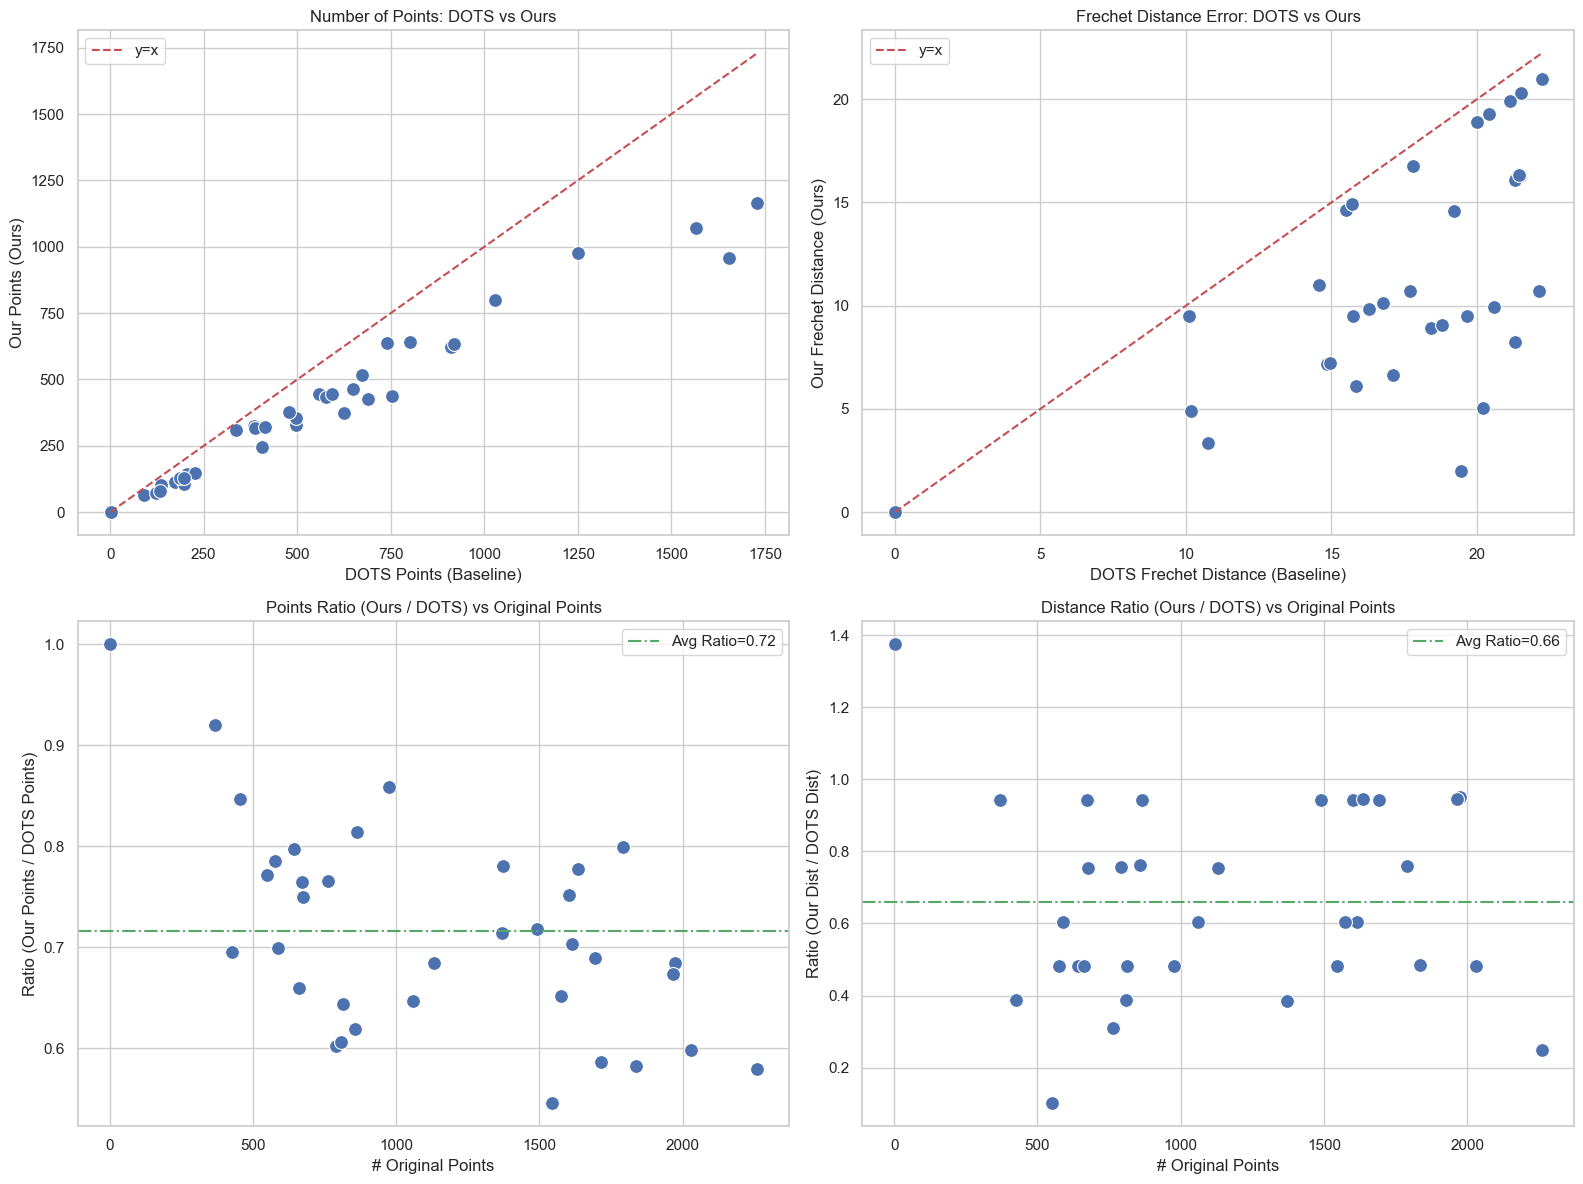

In [27]:
# Reload data to ensure we have the latest columns
points_file = f'{algo}_points.csv'
frechet_file = f'{algo}_frechet.csv'

# Check if files exist
try:
    df_points = pd.read_csv(points_file)
    df_frechet = pd.read_csv(frechet_file)
    
    # Rename columns for frechet file to match our conventions if needed
    if 'best_points' in df_frechet.columns:
        df_frechet = df_frechet.rename(columns={'best_points': 'simp_points', 'best_simp_dist': 'simp_dist'})
    
    # Clean data: remove failed runs (-1)
    df_points = df_points[~(df_points == -1).any(axis=1)]
    df_frechet = df_frechet[~(df_frechet == -1).any(axis=1)]

    # Filter out abnormally small baseline distances (precision error seems to occur in simplify)
    if 'basline_dist' in df_frechet.columns:
        df_frechet = df_frechet[df_frechet['baseline_dist'] >= 0.001]

    # Check for orig_points existence
    if 'orig_points' not in df_points.columns:
        print(f"Warning: 'orig_points' column missing in {points_file}. Some plots will be skipped.")
        has_orig = False
    else:
        has_orig = True

except Exception as e:
    print(f"Error loading data: {e}")
    # Create empty dfs to avoid crashes if files missing
    df_points = pd.DataFrame()
    df_frechet = pd.DataFrame()
    has_orig = False

# Create subplots (adjusted for available data)
if has_orig:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Points Comparison
    sns.scatterplot(data=df_points, x='baseline_points', y='simp_points', palette='viridis', ax=axes[0, 0], s=100)
    max_val = max(df_points['baseline_points'].max(), df_points['simp_points'].max())
    axes[0, 0].plot([0, max_val], [0, max_val], 'r--', label='y=x')
    axes[0, 0].set_title(f'Number of Points: {algo.upper()} vs Ours')
    axes[0, 0].set_xlabel(f'{algo.upper()} Points (Baseline)')
    axes[0, 0].set_ylabel('Our Points (Ours)')
    axes[0, 0].legend()

    # Plot 2: Error Comparison
    sns.scatterplot(data=df_frechet, x='baseline_dist', y='simp_dist', palette='viridis', ax=axes[0, 1], s=100)
    max_dist = max(df_frechet['baseline_dist'].max(), df_frechet['simp_dist'].max())
    axes[0, 1].plot([0, max_dist], [0, max_dist], 'r--', label='y=x')
    axes[0, 1].set_title(f'Frechet Distance Error: {algo.upper()} vs Ours')
    axes[0, 1].set_xlabel(f'{algo.upper()} Frechet Distance (Baseline)')
    axes[0, 1].set_ylabel('Our Frechet Distance (Ours)')
    axes[0, 1].legend()

    # Plot 3: Points Ratio vs Original Points (REVERSED: Ours / Baseline)
    df_points['points_ratio'] = df_points['simp_points'] / df_points['baseline_points']
    avg_points_ratio = df_points['points_ratio'].mean()
    sns.scatterplot(data=df_points, x='orig_points', y='points_ratio', palette='viridis', ax=axes[1, 0], s=100)
    # axes[1, 0].axhline(y=1, color='r', linestyle='--', label='Ratio=1') # Removed as requested
    axes[1, 0].axhline(y=avg_points_ratio, color='g', linestyle='-.', label=f'Avg Ratio={avg_points_ratio:.2f}')
    axes[1, 0].set_title(f'Points Ratio (Ours / {algo.upper()}) vs Original Points')
    axes[1, 0].set_xlabel('# Original Points')
    axes[1, 0].set_ylabel(f'Ratio (Our Points / {algo.upper()} Points)')
    axes[1, 0].legend(loc='upper right')

    # Plot 4: Distance Ratio vs Original Points (REVERSED: Ours / Baseline)
    df_frechet['dist_ratio'] = df_frechet['simp_dist'] / df_frechet['baseline_dist']
    avg_dist_ratio = df_frechet['dist_ratio'].mean()
    sns.scatterplot(data=df_frechet, x='orig_points', y='dist_ratio', palette='viridis', ax=axes[1, 1], s=100)
    # axes[1, 1].axhline(y=1, color='r', linestyle='--', label='Ratio=1') # Removed as requested
    axes[1, 1].axhline(y=avg_dist_ratio, color='g', linestyle='-.', label=f'Avg Ratio={avg_dist_ratio:.2f}')
    axes[1, 1].set_title(f'Distance Ratio (Ours / {algo.upper()}) vs Original Points')
    axes[1, 1].set_xlabel('# Original Points')
    axes[1, 1].set_ylabel(f'Ratio (Our Dist / {algo.upper()} Dist)')
    axes[1, 1].legend(loc='upper right')

    plt.tight_layout()
    plt.show()

else:
    # Fallback to original 1x2 plots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if not df_points.empty:
        sns.scatterplot(data=df_points, x='baseline_points', y='simp_points', palette='viridis', ax=axes[0], s=100)
        max_val = max(df_points['baseline_points'].max(), df_points['simp_points'].max())
        axes[0].plot([0, max_val], [0, max_val], 'r--', label='y=x')
        axes[0].set_title(f'Number of Points: {algo.upper()} vs Ours')
        axes[0].set_xlabel(f'{algo.upper()} Points (Baseline)')
        axes[0].set_ylabel('Our Points (Ours)')
        axes[0].legend()

    if not df_frechet.empty:
        sns.scatterplot(data=df_frechet, x='baseline_dist', y='simp_dist', palette='viridis', ax=axes[1], s=100)
        max_dist = max(df_frechet['baseline_dist'].max(), df_frechet['simp_dist'].max())
        axes[1].plot([0, max_dist], [0, max_dist], 'r--', label='y=x')
        axes[1].set_title(f'Frechet Distance Error: {algo.upper()} vs Ours')
        axes[1].set_xlabel(f'{algo.upper()} Frechet Distance (Baseline)')
        axes[1].set_ylabel('Our Frechet Distance (Ours)')
        axes[1].legend()
    
    plt.tight_layout()
    plt.show()

In [25]:
df_frechet

,id,best_delta,epsilon,baseline_dist,simp_dist,orig_points,baseline_points,simp_points,note,dist_ratio
1,4,11.860031,0.5,17.790047,16.777295,672,136,104,NaN,0.943072
3,1,7.551141,0.5,17.697987,10.702742,588,206,188,NaN,0.604743
5,6,11.459158,0.5,21.485921,16.280813,792,405,260,NaN,0.757743
6,3,5.814148,0.5,21.292048,8.227348,1371,650,570,NaN,0.386405
8,9,7.020921,0.5,20.569104,9.933986,643,557,474,NaN,0.482957
10,13,6.727888,0.5,10.091831,9.519650,368,337,310,NaN,0.943302
12,12,5.068545,0.5,14.849252,7.171575,814,174,174,NaN,0.482959
13,15,11.369368,0.5,21.317564,16.094087,1131,912,652,NaN,0.754968
14,14,6.714283,0.5,19.670750,9.500330,661,497,376,NaN,0.482967
18,22,0.000013,0.5,0.000020,0.000027,2,2,2,NaN,1.374369
